In [20]:
import re
import numpy as np
import pandas as pd
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib.patches import Rectangle

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

#mpl.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble'] = [r'\boldmath']
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
#mpl.rcParams['axes.titleweight'] = 'bold'

mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
#https://matplotlib.org/stable/users/explain/colors/colormaps.html

#plt.style.use('seaborn-v0_8-muted')
# change line thickness for all
plt.rcParams['lines.linewidth'] = 1

In [21]:
PROJECT_ROOT_DIR='.' # Current directory
CHAPTER_ID='Graphs'
IMAGE_PATH=os.path.join(PROJECT_ROOT_DIR,'images',CHAPTER_ID)
os.makedirs(IMAGE_PATH,exist_ok=True)
print(IMAGE_PATH)


def save_fig(fig_id,tight_layout=True,fig_extension='png',resolution=300):
    path=os.path.join(IMAGE_PATH,fig_id+'.'+fig_extension)
    print('Saving figure:', fig_id)
    for ax in plt.gcf().get_axes():
        ax.set_title('')
        # legend = ax.get_legend()
        # if legend:
        #     legend.remove()
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,dpi=resolution,format=fig_extension)

./images/Graphs


In [22]:
# Load the data from RDF.dat file
file_path_EC1_DEC1_1M = 'RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf'  # Make sure to use the correct path to your file
data_EC1_DEC1_1M = pd.read_csv(file_path_EC1_DEC1_1M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(solvent_EC_O2)_g(r)', 'c_RDF[5]_coord(r)','c_RDF[6]_Li_O(solvent_EC_O1)_g(r)', 'c_RDF[7]_coord(r)','c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)', 'c_RDF[9]_coord(r)','c_RDF[10]_Li_O(solvent_DEC_O2)_g(r)', 'c_RDF[11]_coord(r)', 'c_RDF[12]_Li_O(solvent_DEC_O1)_g(r)', 'c_RDF[13]_coord(r)', 'c_RDF[14]_Li_FP_g(r)', 'c_RDF[15]_coord(r)','c_RDF[16]_Li_Li_g(r)', 'c_RDF[17]_coord(r)','c_RDF[18]_Li_P_g(r)', 'c_RDF[19]_coord(r)', 'c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)', 'c_RDF[21]_coord(r)','c_RDF[22]_Li_C(solvent_EC_C2)_g(r)', 'c_RDF[23]_coord(r)','c_RDF[24]_Li_C(solvent_EC_C1)_g(r)', 'c_RDF[25]_coord(r)', 'c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)', 'c_RDF[27]_coord(r)','c_RDF[28]_Li_C(solvent_DEC_C4)_g(r)', 'c_RDF[29]_coord(r)','c_RDF[30]_Li_C(solvent_DEC_C2)_g(r)', 'c_RDF[31]_coord(r)'])

file_path_EC1_DEC1_1p8M = 'RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf'  # Make sure to use the correct path to your file
data_EC1_DEC1_1p8M = pd.read_csv(file_path_EC1_DEC1_1p8M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(solvent_EC_O2)_g(r)', 'c_RDF[5]_coord(r)','c_RDF[6]_Li_O(solvent_EC_O1)_g(r)', 'c_RDF[7]_coord(r)','c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)', 'c_RDF[9]_coord(r)','c_RDF[10]_Li_O(solvent_DEC_O2)_g(r)', 'c_RDF[11]_coord(r)', 'c_RDF[12]_Li_O(solvent_DEC_O1)_g(r)', 'c_RDF[13]_coord(r)', 'c_RDF[14]_Li_FP_g(r)', 'c_RDF[15]_coord(r)','c_RDF[16]_Li_Li_g(r)', 'c_RDF[17]_coord(r)','c_RDF[18]_Li_P_g(r)', 'c_RDF[19]_coord(r)', 'c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)', 'c_RDF[21]_coord(r)','c_RDF[22]_Li_C(solvent_EC_C2)_g(r)', 'c_RDF[23]_coord(r)','c_RDF[24]_Li_C(solvent_EC_C1)_g(r)', 'c_RDF[25]_coord(r)', 'c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)', 'c_RDF[27]_coord(r)','c_RDF[28]_Li_C(solvent_DEC_C4)_g(r)', 'c_RDF[29]_coord(r)','c_RDF[30]_Li_C(solvent_DEC_C2)_g(r)', 'c_RDF[31]_coord(r)'])

file_path_EC1_DEC1_4M = 'RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf'  # Make sure to use the correct path to your file
data_EC1_DEC1_4M = pd.read_csv(file_path_EC1_DEC1_4M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(solvent_EC_O2)_g(r)', 'c_RDF[5]_coord(r)','c_RDF[6]_Li_O(solvent_EC_O1)_g(r)', 'c_RDF[7]_coord(r)','c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)', 'c_RDF[9]_coord(r)','c_RDF[10]_Li_O(solvent_DEC_O2)_g(r)', 'c_RDF[11]_coord(r)', 'c_RDF[12]_Li_O(solvent_DEC_O1)_g(r)', 'c_RDF[13]_coord(r)', 'c_RDF[14]_Li_FP_g(r)', 'c_RDF[15]_coord(r)','c_RDF[16]_Li_Li_g(r)', 'c_RDF[17]_coord(r)','c_RDF[18]_Li_P_g(r)', 'c_RDF[19]_coord(r)', 'c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)', 'c_RDF[21]_coord(r)','c_RDF[22]_Li_C(solvent_EC_C2)_g(r)', 'c_RDF[23]_coord(r)','c_RDF[24]_Li_C(solvent_EC_C1)_g(r)', 'c_RDF[25]_coord(r)', 'c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)', 'c_RDF[27]_coord(r)','c_RDF[28]_Li_C(solvent_DEC_C4)_g(r)', 'c_RDF[29]_coord(r)','c_RDF[30]_Li_C(solvent_DEC_C2)_g(r)', 'c_RDF[31]_coord(r)'])

file_path_EC3_DEC1_1p8M = 'RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf'  # Make sure to use the correct path to your file
data_EC3_DEC1_1p8M = pd.read_csv(file_path_EC3_DEC1_1p8M, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(solvent_EC_O2)_g(r)', 'c_RDF[5]_coord(r)','c_RDF[6]_Li_O(solvent_EC_O1)_g(r)', 'c_RDF[7]_coord(r)','c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)', 'c_RDF[9]_coord(r)','c_RDF[10]_Li_O(solvent_DEC_O2)_g(r)', 'c_RDF[11]_coord(r)', 'c_RDF[12]_Li_O(solvent_DEC_O1)_g(r)', 'c_RDF[13]_coord(r)', 'c_RDF[14]_Li_FP_g(r)', 'c_RDF[15]_coord(r)','c_RDF[16]_Li_Li_g(r)', 'c_RDF[17]_coord(r)','c_RDF[18]_Li_P_g(r)', 'c_RDF[19]_coord(r)', 'c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)', 'c_RDF[21]_coord(r)','c_RDF[22]_Li_C(solvent_EC_C2)_g(r)', 'c_RDF[23]_coord(r)','c_RDF[24]_Li_C(solvent_EC_C1)_g(r)', 'c_RDF[25]_coord(r)', 'c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)', 'c_RDF[27]_coord(r)','c_RDF[28]_Li_C(solvent_DEC_C4)_g(r)', 'c_RDF[29]_coord(r)','c_RDF[30]_Li_C(solvent_DEC_C2)_g(r)', 'c_RDF[31]_coord(r)'])

file_path = 'RDF_1_1000000_1000000_bin3000_pureEC.rdf'  # Make sure to use the correct path to your file
data_pureEC = pd.read_csv(file_path, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(solvent_EC_O2)_g(r)', 'c_RDF[5]_coord(r)','c_RDF[6]_Li_O(solvent_EC_O1)_g(r)', 'c_RDF[7]_coord(r)', 'c_RDF[8]_Li_FP_g(r)', 'c_RDF[9]_coord(r)','c_RDF[10]_Li_Li_g(r)', 'c_RDF[11]_coord(r)','c_RDF[12]_Li_P_g(r)', 'c_RDF[13]_coord(r)', 'c_RDF[14]_Li_C(solvent_EC_C3_central_carbon)_g(r)', 'c_RDF[15]_coord(r)','c_RDF[16]_Li_C(solvent_EC_C2)_g(r)', 'c_RDF[17]_coord(r)','c_RDF[18]_Li_C(solvent_EC_C1)_g(r)', 'c_RDF[19]_coord(r)'])

file_path = 'RDF_1_1000000_1000000_bin3000_pureDEC.rdf'  # Make sure to use the correct path to your file
data_pureDEC = pd.read_csv(file_path, sep=' ', names=['row_bins', 'c_RDF[1]_r', 'c_RDF[2]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)', 'c_RDF[3]_coord(r)', 'c_RDF[4]_Li_O(solvent_DEC_O2)_g(r)', 'c_RDF[5]_coord(r)','c_RDF[6]_Li_O(solvent_DEC_O1)_g(r)', 'c_RDF[7]_coord(r)', 'c_RDF[8]_Li_FP_g(r)', 'c_RDF[9]_coord(r)','c_RDF[10]_Li_Li_g(r)', 'c_RDF[11]_coord(r)','c_RDF[12]_Li_P_g(r)', 'c_RDF[13]_coord(r)', 'c_RDF[14]_Li_C(solvent_DEC_C3_central_carbon)_g(r)', 'c_RDF[15]_coord(r)','c_RDF[16]_Li_C(solvent_DEC_C4)_g(r)', 'c_RDF[17]_coord(r)','c_RDF[18]_Li_C(solvent_DEC_C2)_g(r)', 'c_RDF[19]_coord(r)'])

Saving figure: RDF_Li_O(solvent)_EC_DEC


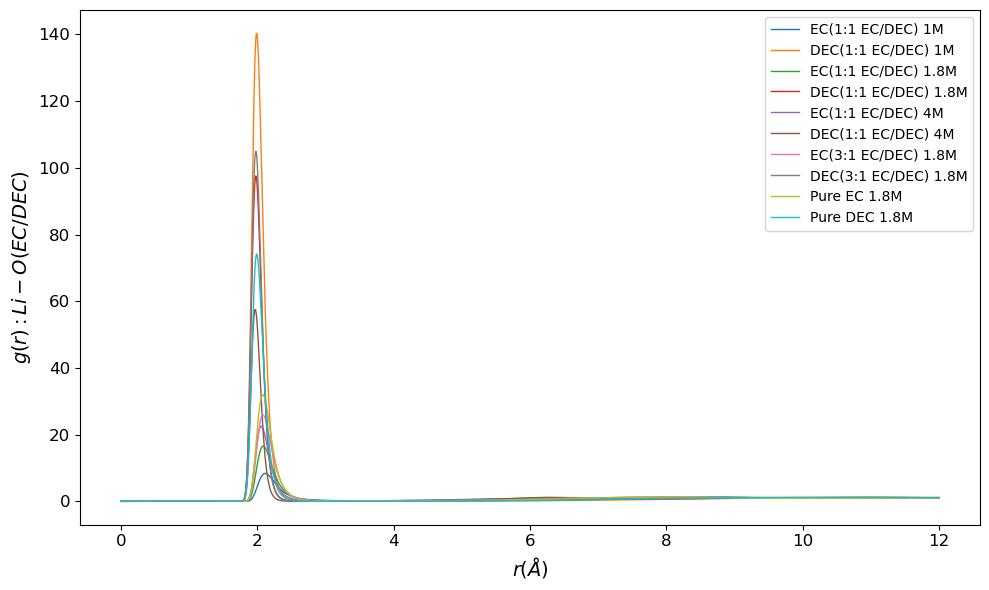

Saving figure: RDF_Li_C(solvent)_EC_DEC


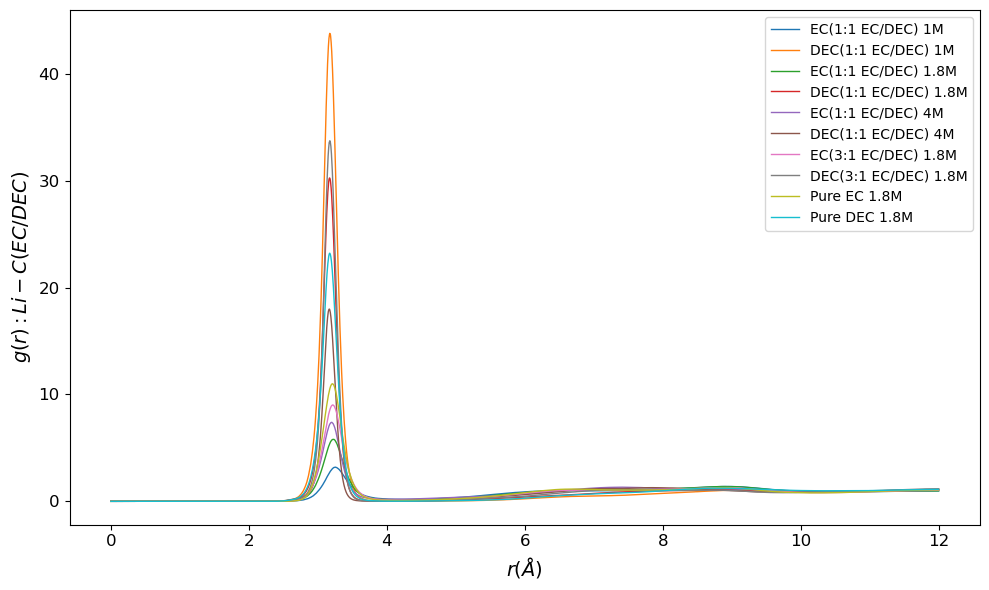

Saving figure: RDF_Li_F(PF6)_EC_DEC


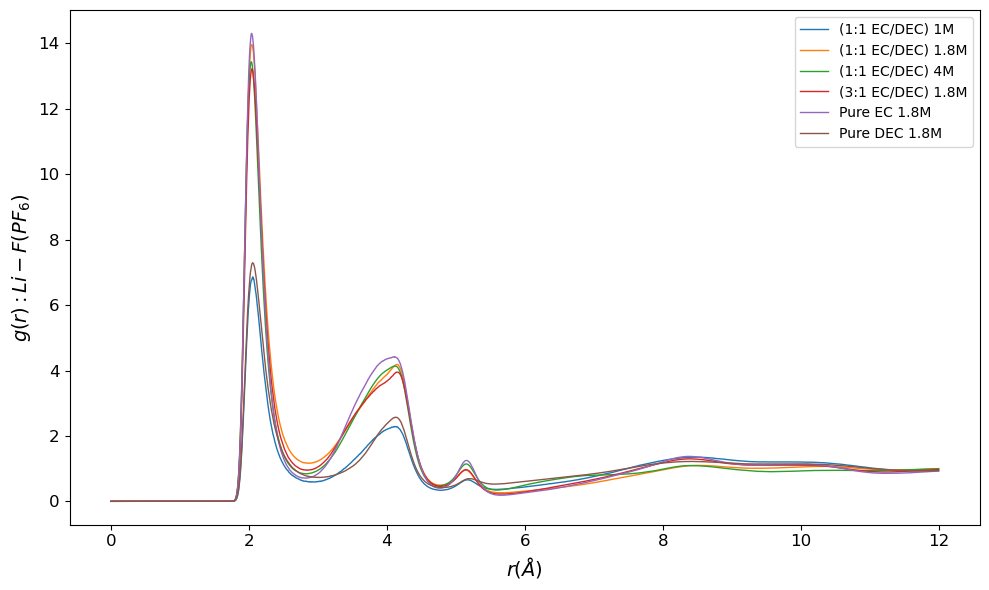

Saving figure: RDF_Li_P(PF6)_EC_DEC


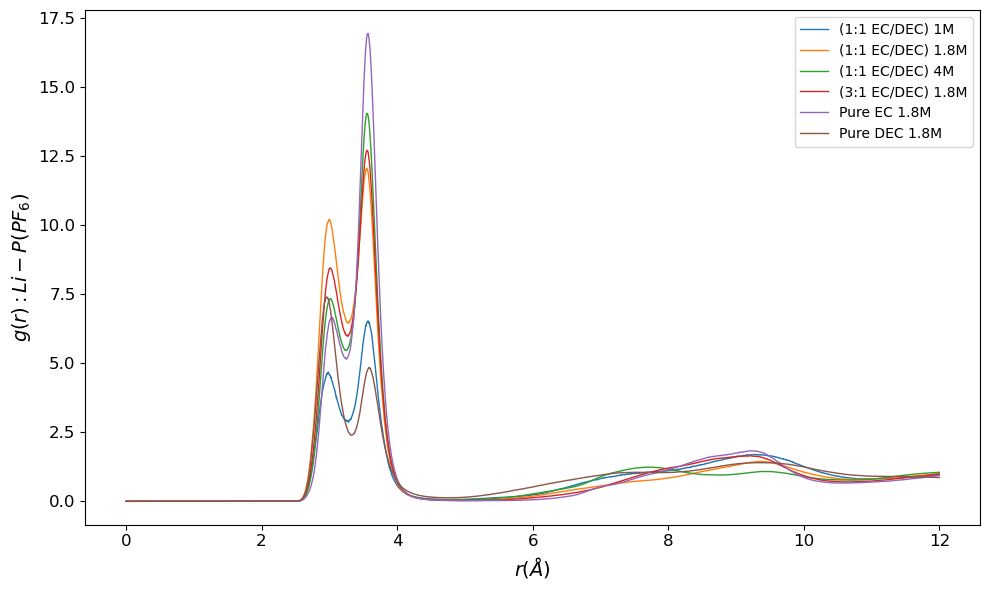

Saving figure: RDF_Li_Li_EC_DEC


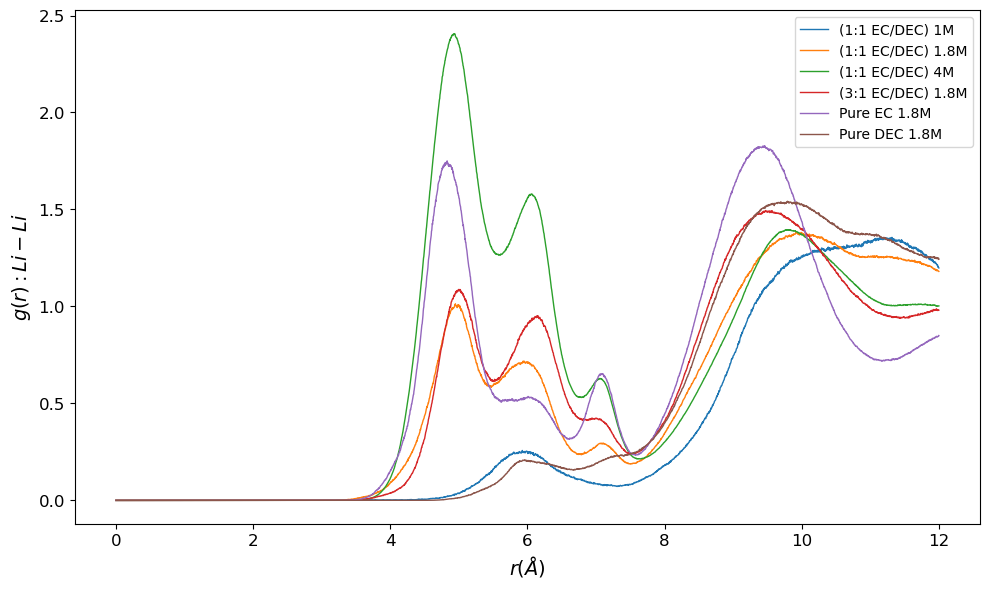

In [23]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(1:1 EC/DEC) 4M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(3:1 EC/DEC) 1.8M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[2]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='Pure DEC 1.8M')


# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-O(EC/DEC)$')
plt.title('Plot of r vs g(r) for Li-O(solvent)')
plt.legend()
save_fig('RDF_Li_O(solvent)_EC_DEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(1:1 EC/DEC) 4M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(3:1 EC/DEC) 1.8M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[14]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[14]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='Pure DEC 1.8M')


# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-C(EC/DEC)$')
plt.title('Plot of r vs g(r) for Li-C(solvent)')
plt.legend()
save_fig('RDF_Li_C(solvent)_EC_DEC')
# Show the plot
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[14]_Li_FP_g(r)'], label='(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'], label='(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[14]_Li_FP_g(r)'], label='(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'], label='(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[8]_Li_FP_g(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[8]_Li_FP_g(r)'], label='Pure DEC 1.8M')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-F(PF_6)$')
plt.title('Plot of r vs g(r) for Li-F(PF6)')
plt.legend()
save_fig('RDF_Li_F(PF6)_EC_DEC')
# Show the plot
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[18]_Li_P_g(r)'], label='(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'], label='(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[18]_Li_P_g(r)'], label='(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'], label='(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[12]_Li_P_g(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[12]_Li_P_g(r)'], label='Pure DEC 1.8M')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-P(PF_6)$')
plt.title('Plot of r vs g(r) for Li-P(PF6)')
plt.legend()
save_fig('RDF_Li_P(PF6)_EC_DEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[16]_Li_Li_g(r)'], label='(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'], label='(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[16]_Li_Li_g(r)'], label='(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'], label='(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[10]_Li_Li_g(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[10]_Li_Li_g(r)'], label='Pure DEC 1.8M')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-Li$')
plt.title('Plot of r vs g(r) for Li-Li')
plt.legend()
save_fig('RDF_Li_Li_EC_DEC')
# Show the plot
plt.show()






Saving figure: RDF_Li_O(solvent)_inset_EC_DEC


/var/folders/gh/j7mcjbpx16dc0prr6v6_62lc0000gn/T/ipykernel_3439/641606264.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


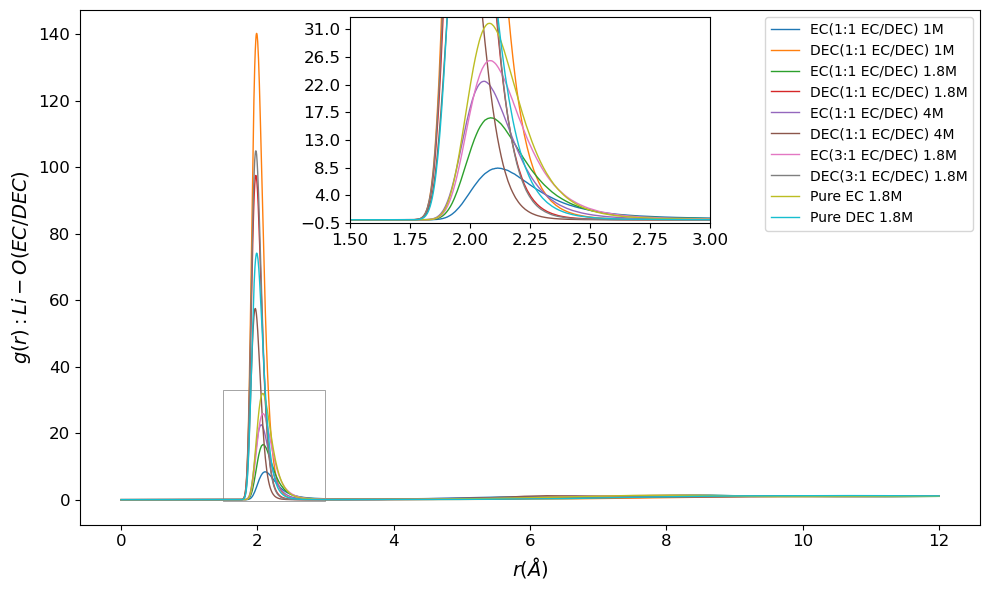

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(1:1 EC/DEC) 4M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(3:1 EC/DEC) 1.8M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[2]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='Pure DEC 1.8M')
# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-O(EC/DEC)$')
plt.title('Plot of r vs g(r) for Li-O(solvent)')
plt.legend()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='EC(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='DEC(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'], label='Pure EC 1.8M')
inset_ax.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[2]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'], label='Pure DEC 1.8M')
inset_ax.set_xlim(1.5, 3)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 33)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 33, 4.5))
x1, x2, y1, y2 = 1.5, 3, -0.5, 33
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('RDF_Li_O(solvent)_inset_EC_DEC')
# Show the plot
plt.show()

Saving figure: RDF_Li_C(solvent)_inset_EC_DEC


/var/folders/gh/j7mcjbpx16dc0prr6v6_62lc0000gn/T/ipykernel_3439/641606264.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


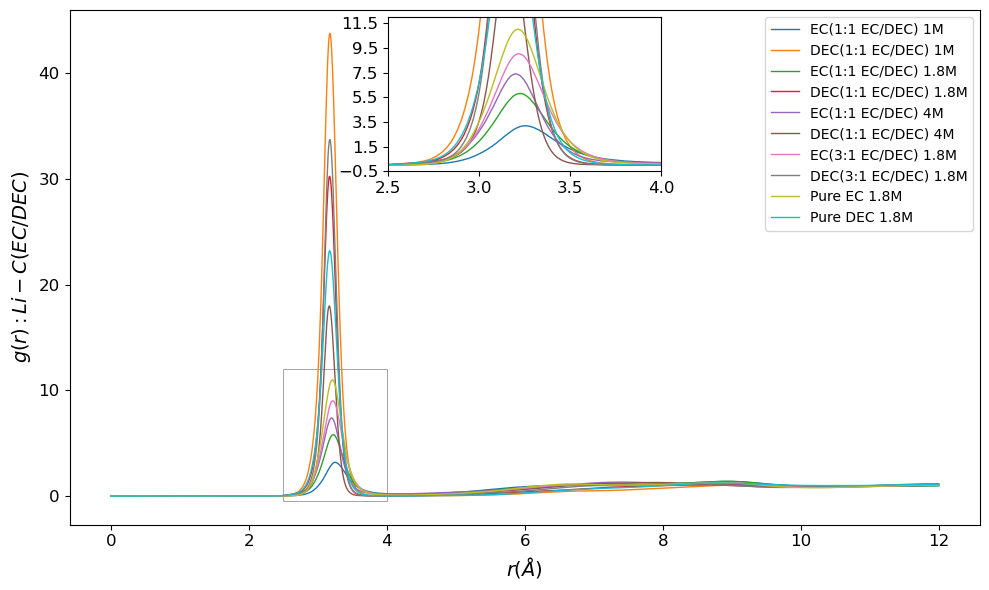

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(1:1 EC/DEC) 4M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(3:1 EC/DEC) 1.8M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[14]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[14]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='Pure DEC 1.8M')


# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$g(r): Li-C(EC/DEC)$')
plt.title('Plot of r vs g(r) for Li-C(solvent)')
plt.legend()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='EC(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='DEC(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[14]_Li_C(solvent_EC_C3_central_carbon)_g(r)'], label='Pure EC 1.8M')
inset_ax.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[14]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'], label='Pure DEC 1.8M')
inset_ax.set_xlim(2.5, 4)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 12)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 12, 2))
x1, x2, y1, y2 = 2.5, 4, -0.5, 12
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('RDF_Li_C(solvent)_inset_EC_DEC')
# Show the plot
plt.show()

Saving figure: CN_Li_O(solvent)_EC_DEC


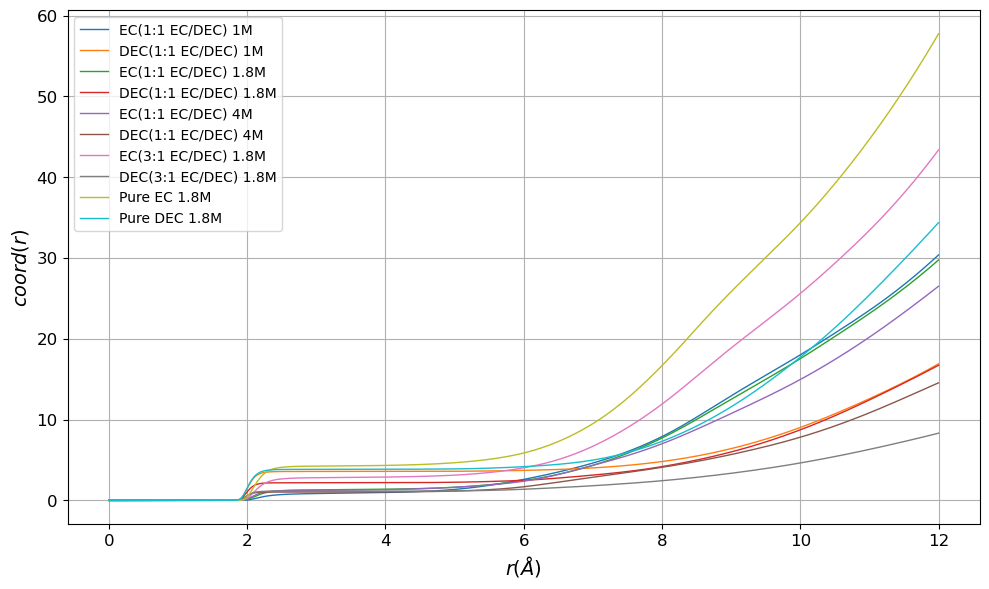

Saving figure: CN_Li_C(solvent)_EC_DEC


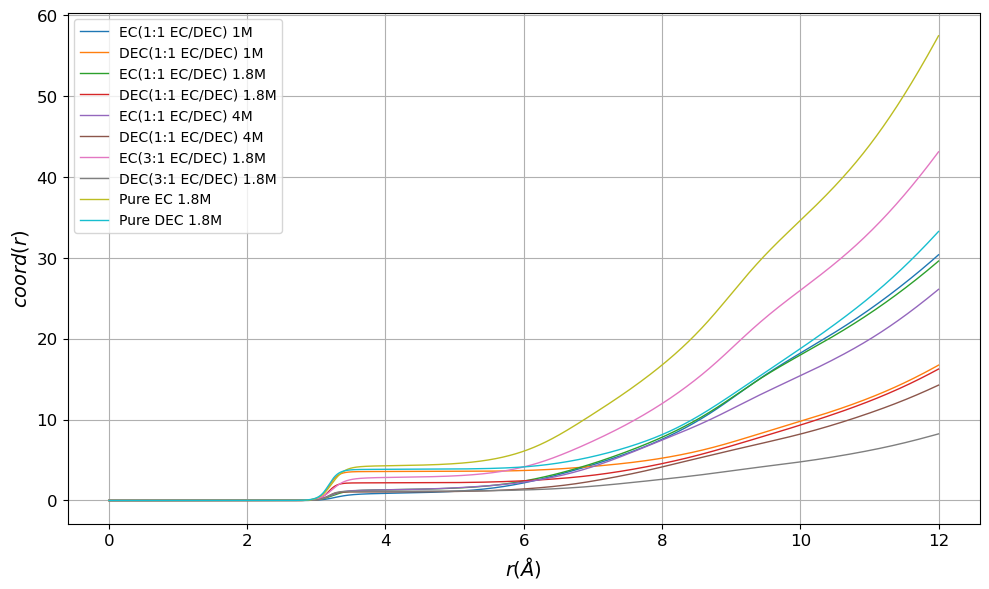

Saving figure: CN_Li_F(PF6)_EC_DEC


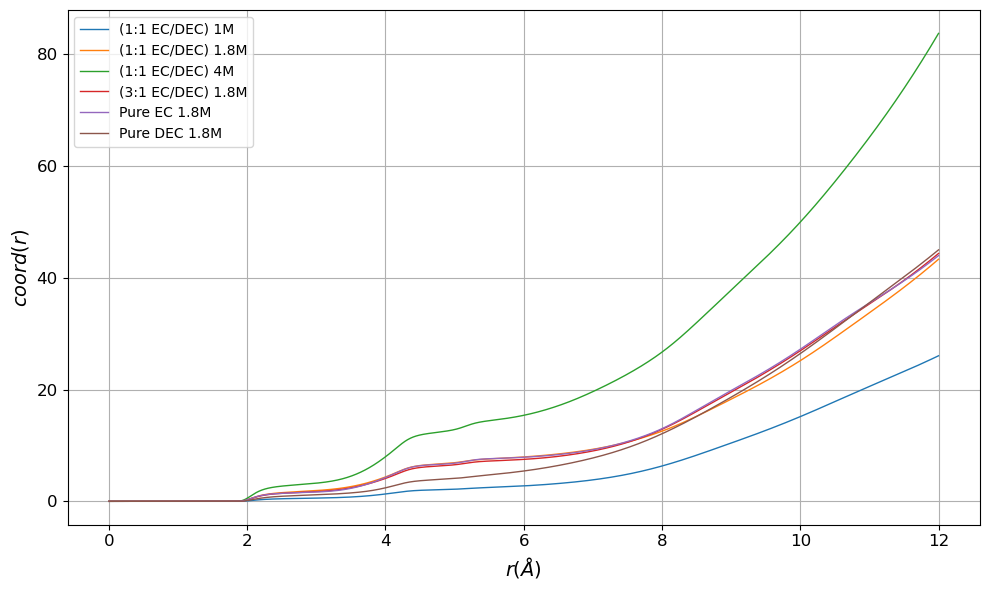

Saving figure: CN_Li_P(PF6)_EC_DEC


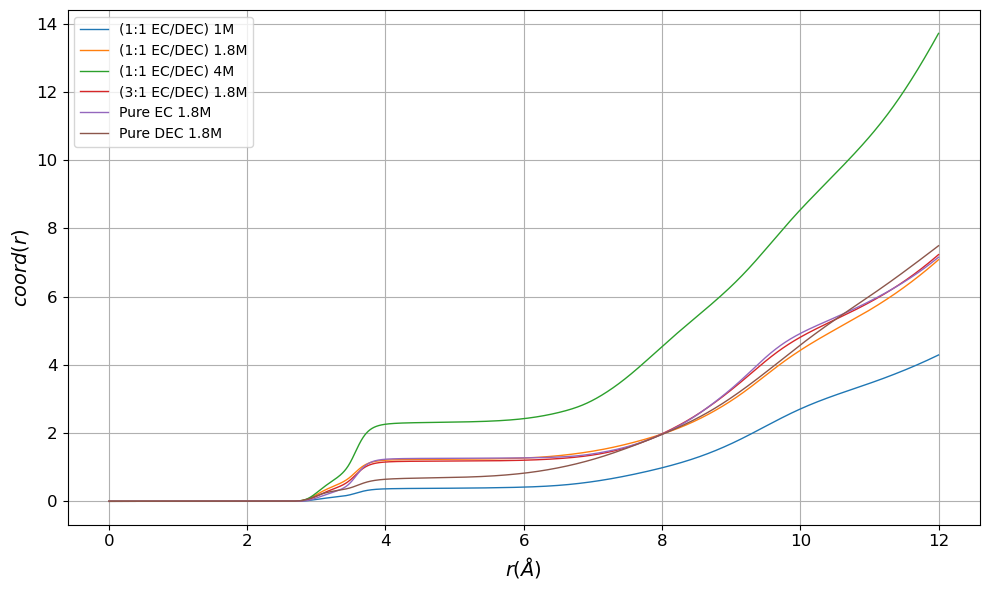

Saving figure: CN_Li_Li_EC_DEC


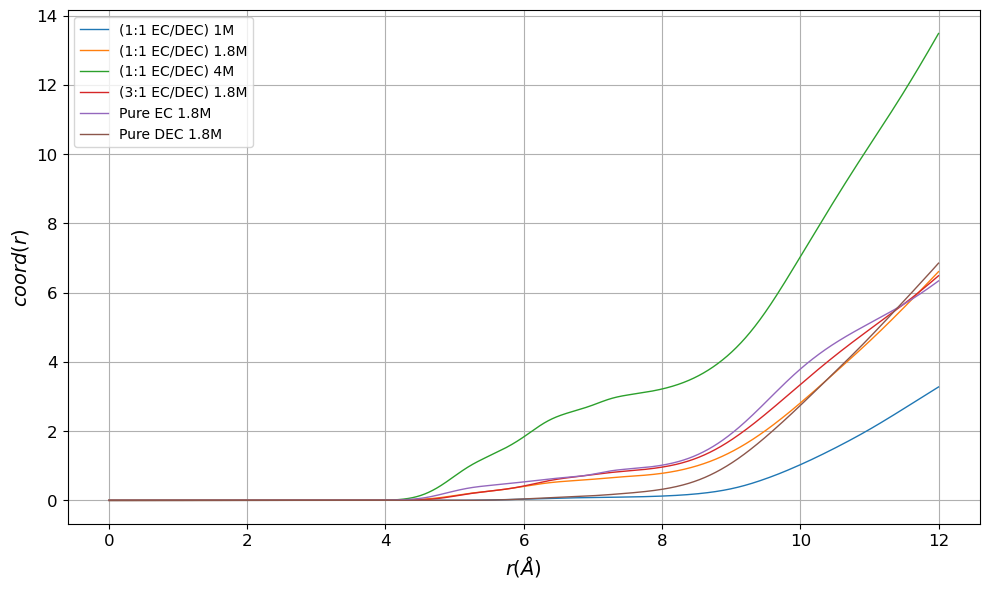

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[3]_coord(r)'], label='EC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[9]_coord(r)'], label='DEC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[3]_coord(r)'], label='EC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[9]_coord(r)'], label='DEC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[3]_coord(r)'], label='EC(1:1 EC/DEC) 4M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[9]_coord(r)'], label='DEC(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[3]_coord(r)'], label='EC(3:1 EC/DEC) 1.8M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[9]_coord(r)'], label='DEC(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[3]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[3]_coord(r)'], label='Pure DEC 1.8M')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-O(solvent)')
plt.legend()
plt.grid()
save_fig('CN_Li_O(solvent)_EC_DEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[21]_coord(r)'], label='EC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[27]_coord(r)'], label='DEC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[21]_coord(r)'], label='EC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[27]_coord(r)'], label='DEC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[21]_coord(r)'], label='EC(1:1 EC/DEC) 4M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[27]_coord(r)'], label='DEC(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[21]_coord(r)'], label='EC(3:1 EC/DEC) 1.8M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[27]_coord(r)'], label='DEC(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[15]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[15]_coord(r)'], label='Pure DEC 1.8M')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-C(solvent)')
plt.legend()
plt.grid()
save_fig('CN_Li_C(solvent)_EC_DEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[15]_coord(r)'], label='(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[15]_coord(r)'], label='(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[15]_coord(r)'], label='(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[15]_coord(r)'], label='(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[9]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[9]_coord(r)'], label='Pure DEC 1.8M')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-F(PF6)')
plt.legend()
plt.grid()
save_fig('CN_Li_F(PF6)_EC_DEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[19]_coord(r)'], label='(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[19]_coord(r)'], label='(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[19]_coord(r)'], label='(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[19]_coord(r)'], label='(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[13]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[13]_coord(r)'], label='Pure DEC 1.8M')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-P(PF6)')
plt.legend()
plt.grid()
save_fig('CN_Li_P(PF6)_EC_DEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[17]_coord(r)'], label='(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[17]_coord(r)'], label='(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[17]_coord(r)'], label='(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[17]_coord(r)'], label='(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[11]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[11]_coord(r)'], label='Pure DEC 1.8M')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-Li')
plt.legend()
plt.grid()
save_fig('CN_Li_Li_EC_DEC')
# Show the plot
plt.show()

Saving figure: CN_Li_O(solvent)_inset_EC_DEC


/var/folders/gh/j7mcjbpx16dc0prr6v6_62lc0000gn/T/ipykernel_3439/641606264.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


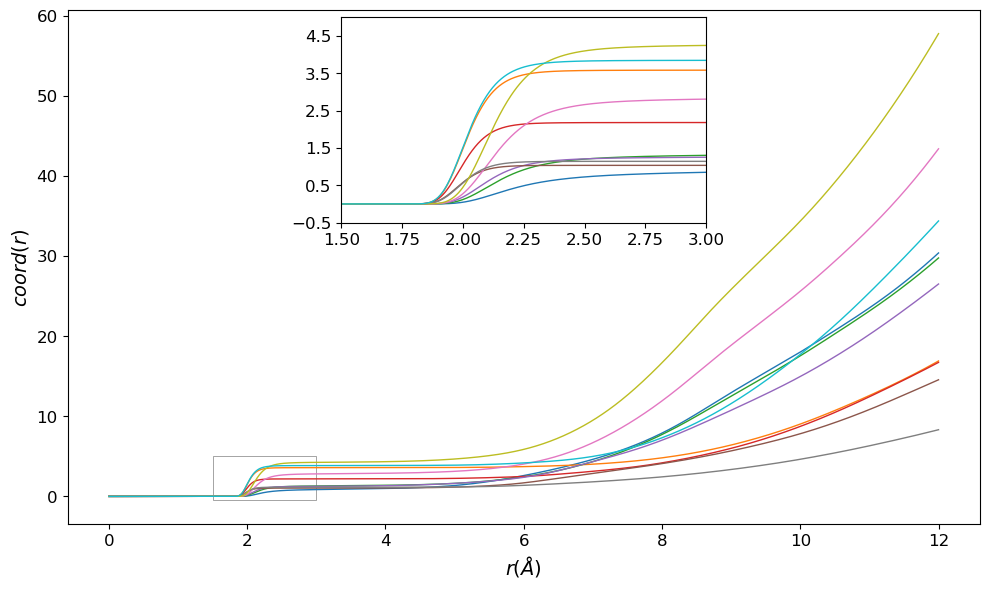

Saving figure: CN_Li_C(solvent)_inset_EC_DEC


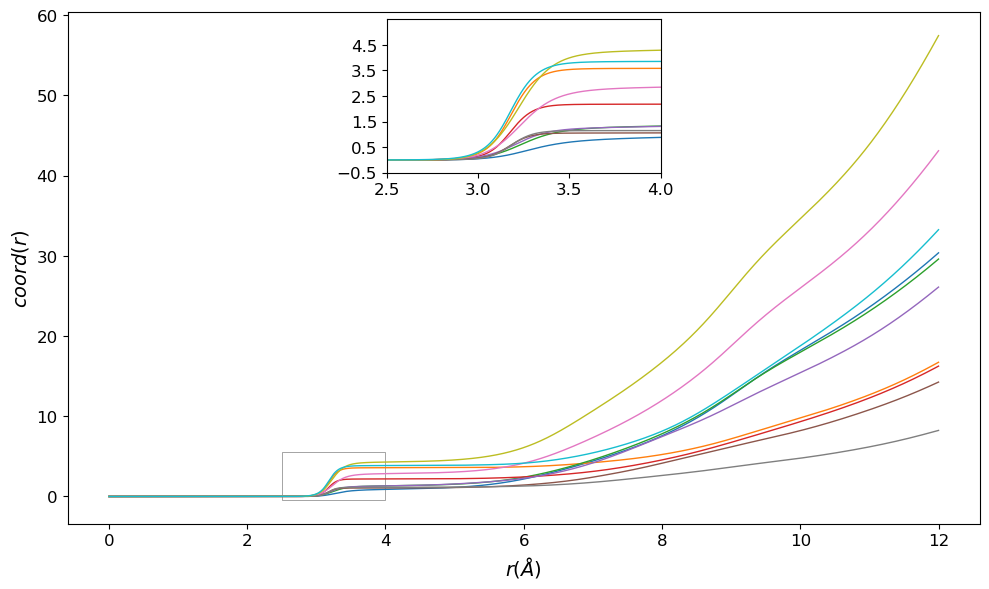

Saving figure: CN_Li_F(PF6)_inset_EC_DEC


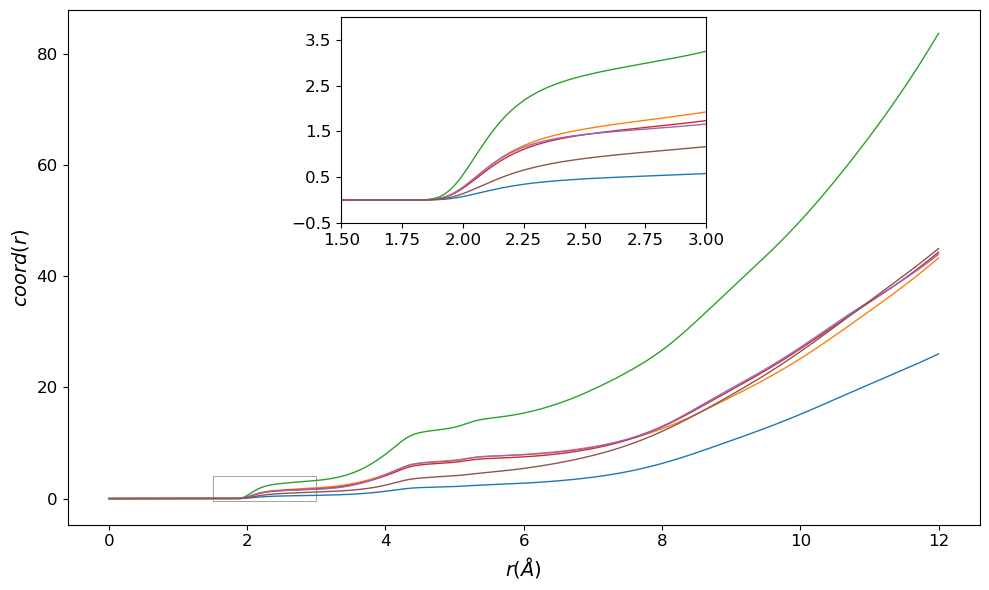

Saving figure: CN_Li_P(PF6)_inset_EC_DEC


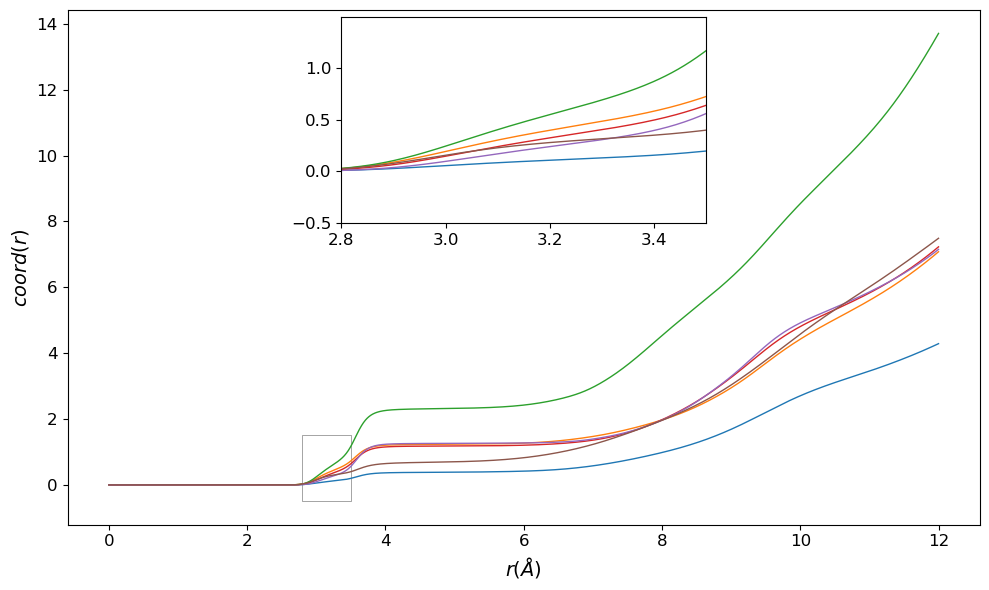

Saving figure: CN_Li_Li_inset_EC_DEC


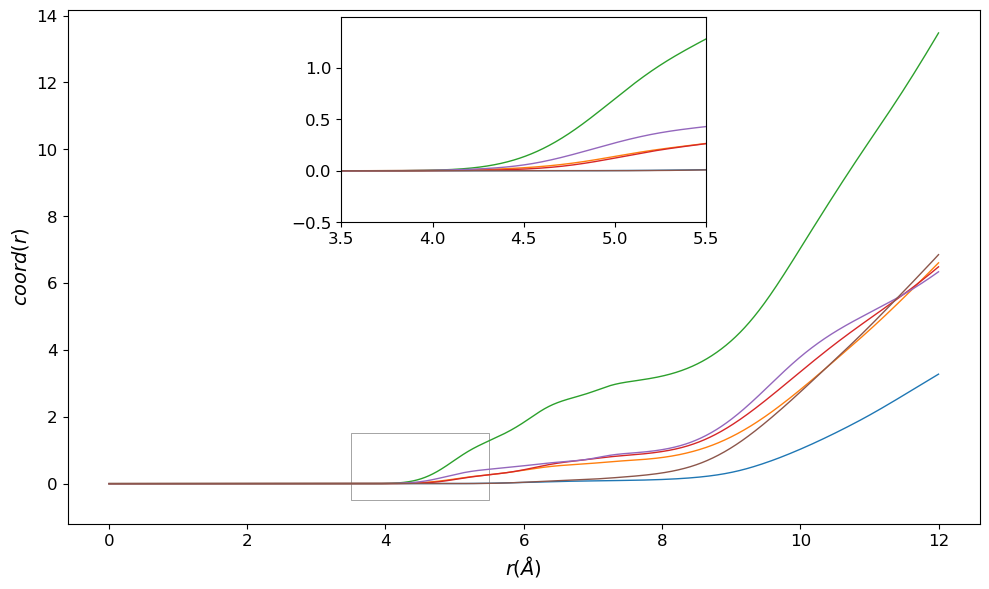

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[3]_coord(r)'], label='EC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[9]_coord(r)'], label='DEC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[3]_coord(r)'], label='EC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[9]_coord(r)'], label='DEC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[3]_coord(r)'], label='EC(1:1 EC/DEC) 4M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[9]_coord(r)'], label='DEC(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[3]_coord(r)'], label='EC(3:1 EC/DEC) 1.8M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[9]_coord(r)'], label='DEC(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[3]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[3]_coord(r)'], label='Pure DEC 1.8M')
# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-O(solvent)')
# plt.legend()
# plt.grid()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[3]_coord(r)'], label='EC(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[9]_coord(r)'], label='DEC(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[3]_coord(r)'], label='EC(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[9]_coord(r)'], label='DEC(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[3]_coord(r)'], label='EC(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[9]_coord(r)'], label='DEC(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[3]_coord(r)'], label='EC(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[9]_coord(r)'], label='DEC(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[3]_coord(r)'], label='Pure EC 1.8M')
inset_ax.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[3]_coord(r)'], label='Pure DEC 1.8M')
inset_ax.set_xlim(1.5, 3)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 5)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 5, 1))
x1, x2, y1, y2 = 1.5, 3, -0.5, 5
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('CN_Li_O(solvent)_inset_EC_DEC')
# save_fig('CN_Li_O(solvent)', fig_extension='svg')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[21]_coord(r)'], label='EC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[27]_coord(r)'], label='DEC(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[21]_coord(r)'], label='EC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[27]_coord(r)'], label='DEC(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[21]_coord(r)'], label='EC(1:1 EC/DEC) 4M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[27]_coord(r)'], label='DEC(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[21]_coord(r)'], label='EC(3:1 EC/DEC) 1.8M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[27]_coord(r)'], label='DEC(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[15]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[15]_coord(r)'], label='Pure DEC 1.8M')

# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-C(solvent)')
# plt.legend()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[21]_coord(r)'], label='EC(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[27]_coord(r)'], label='DEC(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[21]_coord(r)'], label='EC(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[27]_coord(r)'], label='DEC(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[21]_coord(r)'], label='EC(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[27]_coord(r)'], label='DEC(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[21]_coord(r)'], label='EC(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[27]_coord(r)'], label='DEC(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[15]_coord(r)'], label='Pure EC 1.8M')
inset_ax.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[15]_coord(r)'], label='Pure DEC 1.8M')
inset_ax.set_xlim(2.5, 4)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 5.5)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 5.5, 1))
x1, x2, y1, y2 = 2.5, 4, -0.5, 5.5
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('CN_Li_C(solvent)_inset_EC_DEC')
# save_fig('CN_Li_C(solvent)', fig_extension='svg')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[15]_coord(r)'], label='(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[15]_coord(r)'], label='(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[15]_coord(r)'], label='(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[15]_coord(r)'], label='(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[9]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[9]_coord(r)'], label='Pure DEC 1.8M')
# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-F(PF6)')
# plt.legend()
# plt.grid()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[15]_coord(r)'], label='(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[15]_coord(r)'], label='(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[15]_coord(r)'], label='(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[15]_coord(r)'], label='(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[9]_coord(r)'], label='Pure EC 1.8M')
inset_ax.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[9]_coord(r)'], label='Pure DEC 1.8M')
inset_ax.set_xlim(1.5, 3)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 4)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 4, 1))
x1, x2, y1, y2 = 1.5, 3, -0.5, 4
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('CN_Li_F(PF6)_inset_EC_DEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[19]_coord(r)'], label='(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[19]_coord(r)'], label='(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[19]_coord(r)'], label='(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[19]_coord(r)'], label='(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[13]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[13]_coord(r)'], label='Pure DEC 1.8M')
# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-P(PF6)')
# plt.legend()
# plt.grid()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[19]_coord(r)'], label='(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[19]_coord(r)'], label='(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[19]_coord(r)'], label='(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[19]_coord(r)'], label='(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[13]_coord(r)'], label='Pure EC 1.8M')
inset_ax.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[13]_coord(r)'], label='Pure DEC 1.8M')
inset_ax.set_xlim(2.8, 3.5)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 1.5)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 1.5, 0.5))
x1, x2, y1, y2 = 2.8, 3.5, -0.5, 1.5
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('CN_Li_P(PF6)_inset_EC_DEC')
# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[17]_coord(r)'], label='(1:1 EC/DEC) 1M')
plt.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[17]_coord(r)'], label='(1:1 EC/DEC) 1.8M')
plt.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[17]_coord(r)'], label='(1:1 EC/DEC) 4M')
plt.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[17]_coord(r)'], label='(3:1 EC/DEC) 1.8M')
plt.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[11]_coord(r)'], label='Pure EC 1.8M')
plt.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[11]_coord(r)'], label='Pure DEC 1.8M')
# Adding labels and title
plt.xlabel(r'$r (\AA)$')
plt.ylabel(r'$coord(r)$')
plt.title('Plot of r vs coord(r) for Li-Li')
# plt.legend()
# plt.grid()
# get the plt ax
ax = plt.gca()
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper center')
# Plot the same data on the inset, but with different limits to zoom in
inset_ax.plot(data_EC1_DEC1_1M['c_RDF[1]_r'], data_EC1_DEC1_1M['c_RDF[17]_coord(r)'], label='(1:1 EC/DEC) 1M')
inset_ax.plot(data_EC1_DEC1_1p8M['c_RDF[1]_r'], data_EC1_DEC1_1p8M['c_RDF[17]_coord(r)'], label='(1:1 EC/DEC) 1.8M')
inset_ax.plot(data_EC1_DEC1_4M['c_RDF[1]_r'], data_EC1_DEC1_4M['c_RDF[17]_coord(r)'], label='(1:1 EC/DEC) 4M')
inset_ax.plot(data_EC3_DEC1_1p8M['c_RDF[1]_r'], data_EC3_DEC1_1p8M['c_RDF[17]_coord(r)'], label='(3:1 EC/DEC) 1.8M')
inset_ax.plot(data_pureEC['c_RDF[1]_r'], data_pureEC['c_RDF[11]_coord(r)'], label='Pure EC 1.8M')
inset_ax.plot(data_pureDEC['c_RDF[1]_r'], data_pureDEC['c_RDF[11]_coord(r)'], label='Pure DEC 1.8M')
inset_ax.set_xlim(3.5, 5.5)  # Adjust these limits to focus on the desired part
inset_ax.set_ylim(-0.5, 1.5)  # Adjust these limits as well
# set inset_ax y ticks 0.5 apart
inset_ax.set_yticks(np.arange(-0.5, 1.5, 0.5))
x1, x2, y1, y2 = 3.5, 5.5, -0.5, 1.5
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=0.5, edgecolor='gray', facecolor='none')
ax.add_patch(rect)
save_fig('CN_Li_Li_inset_EC_DEC')
# Show the plot
plt.show()

Saving figure: Bar_plot_CN_EC_DEC


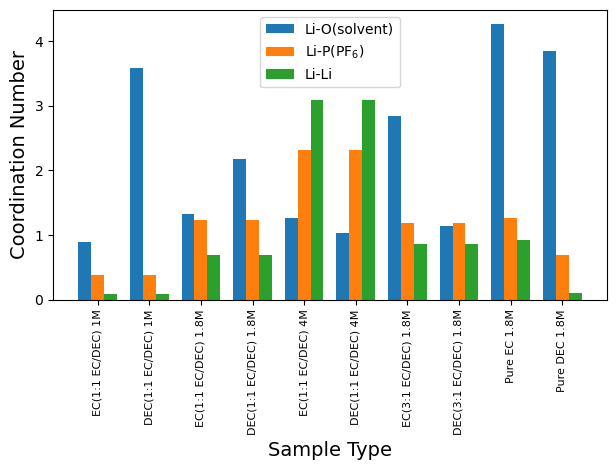

In [28]:
#CN is the first inflection point in the CN plot.
# Categories
categories = ['EC(1:1 EC/DEC) 1M', 'DEC(1:1 EC/DEC) 1M', 'EC(1:1 EC/DEC) 1.8M', 'DEC(1:1 EC/DEC) 1.8M', 'EC(1:1 EC/DEC) 4M', 'DEC(1:1 EC/DEC) 4M', 'EC(3:1 EC/DEC) 1.8M', 'DEC(3:1 EC/DEC) 1.8M', 'Pure EC 1.8M', 'Pure DEC 1.8M']

# Data: [Li-O(solvent), Li-P(PF6), Li-Li] for each category
values = [
    [0.90, 0.38, 0.09],  # EC(EC1+DEC1_1M)
    [3.58, 0.38, 0.09],  # DEC(EC1+DEC1_1M)
    [1.33, 1.23, 0.69],  # EC(EC1+DEC1_1.8M)
    [2.18, 1.23, 0.69],   # DEC(EC1+DEC1_1.8M)
    [1.26, 2.32, 3.09],  # EC(EC1+DEC1_4M)
    [1.03, 2.32, 3.09],  # DEC(EC1+DEC1_4M)
    [2.84, 1.18, 0.86],  # EC(EC3+DEC1_1.8M)
    [1.14, 1.18, 0.86],   # DEC(EC3+DEC1_1.8M)
    [4.27, 1.26, 0.92],  # pure EC
    [3.85, 0.69, 0.10]   # pure DEC
]

values = np.array(values)  # Convert to NumPy array for easier manipulation

# Bar settings
num_categories = len(categories)
bar_width = 0.25  # Width of the bars
index = np.arange(num_categories)

# Plotting
fig, ax = plt.subplots()
for i in range(3):  # Three bars for each category
    label=["O(solvent)", "$\\mathrm{P(PF_6)}$", "Li"][i]
    ax.bar(index + i*bar_width, values[:, i], bar_width, label=f'Li-{label}')

# for i in range(3):  # Three bars for each category
#     label=["$\\mathrm{Li^+}$ - O(solvent)", "$\\mathrm{Li^+}$ - $\\mathrm{P(PF_6^-)}$", "$\\mathrm{Li^+}$ - $\\mathrm{Li^+}$"][i]
#     ax.bar(index + i*bar_width, values[:, i], bar_width, label=f'{label}')


# Final plot adjustments
ax.set_xlabel('Sample Type')
ax.set_ylabel('Coordination Number')
ax.set_title('Bar plot for different conditions')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(categories)
#make the categories labels smaller
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10)

ax.legend()
save_fig('Bar_plot_CN_EC_DEC')
# Show plot
plt.show()



In [29]:
#give the maximum value of column c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_O_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'].max()
max_r_Li_O_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == max_g_r_Li_O_solvent_EC_EC1DEC1_1M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_O_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'].max()
max_r_Li_O_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == max_g_r_Li_O_solvent_DEC_EC1DEC1_1M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_O_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'].max()
max_r_Li_O_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == max_g_r_Li_O_solvent_EC_EC1DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_O_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'].max()
max_r_Li_O_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == max_g_r_Li_O_solvent_DEC_EC1DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_O_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'].max()
max_r_Li_O_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == max_g_r_Li_O_solvent_EC_EC1DEC1_4M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_O_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'].max()
max_r_Li_O_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == max_g_r_Li_O_solvent_DEC_EC1DEC1_4M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_O_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'].max()
max_r_Li_O_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == max_g_r_Li_O_solvent_EC_EC3DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_O_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'].max()
max_r_Li_O_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == max_g_r_Li_O_solvent_DEC_EC3DEC1_1p8M]['c_RDF[1]_r'].values[0]




print('EC(EC1+DEC1)_1M:', max_g_r_Li_O_solvent_EC_EC1DEC1_1M)
print('EC(EC1+DEC1)_1M:', max_r_Li_O_solvent_EC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', max_g_r_Li_O_solvent_DEC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', max_r_Li_O_solvent_DEC_EC1DEC1_1M)
print('EC(EC1+DEC1)_1.8M:', max_g_r_Li_O_solvent_EC_EC1DEC1_1p8M)
print('EC(EC1+DEC1)_1.8M:', max_r_Li_O_solvent_EC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', max_g_r_Li_O_solvent_DEC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', max_r_Li_O_solvent_DEC_EC1DEC1_1p8M)
print('EC(EC1+DEC1)_4M:', max_g_r_Li_O_solvent_EC_EC1DEC1_4M)
print('EC(EC1+DEC1)_4M:', max_r_Li_O_solvent_EC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', max_g_r_Li_O_solvent_DEC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', max_r_Li_O_solvent_DEC_EC1DEC1_4M)
print('EC(EC3+DEC1)_1.8M:', max_g_r_Li_O_solvent_EC_EC3DEC1_1p8M)
print('EC(EC3+DEC1)_1.8M:', max_r_Li_O_solvent_EC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', max_g_r_Li_O_solvent_DEC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', max_r_Li_O_solvent_DEC_EC3DEC1_1p8M)



EC(EC1+DEC1)_1M: 8.40845
EC(EC1+DEC1)_1M: 2.114
DEC(EC1+DEC1)_1M: 140.328
DEC(EC1+DEC1)_1M: 1.99
EC(EC1+DEC1)_1.8M: 16.5934
EC(EC1+DEC1)_1.8M: 2.086
DEC(EC1+DEC1)_1.8M: 97.5763
DEC(EC1+DEC1)_1.8M: 1.978
EC(EC1+DEC1)_4M: 22.5258
EC(EC1+DEC1)_4M: 2.058
DEC(EC1+DEC1)_4M: 57.544
DEC(EC1+DEC1)_4M: 1.97
EC(EC3+DEC1)_1.8M: 25.8924
EC(EC3+DEC1)_1.8M: 2.082
DEC(EC3+DEC1)_1.8M: 104.982
DEC(EC3+DEC1)_1.8M: 1.978


In [30]:
#give the maximum value of column c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_C_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'].max()
max_r_Li_C_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == max_g_r_Li_C_solvent_EC_EC1DEC1_1M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_C_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'].max()
max_r_Li_C_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == max_g_r_Li_C_solvent_DEC_EC1DEC1_1M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_C_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'].max()
max_r_Li_C_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == max_g_r_Li_C_solvent_EC_EC1DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_C_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'].max()
max_r_Li_C_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == max_g_r_Li_C_solvent_DEC_EC1DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_C_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'].max()
max_r_Li_C_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == max_g_r_Li_C_solvent_EC_EC1DEC1_4M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_C_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'].max()
max_r_Li_C_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == max_g_r_Li_C_solvent_DEC_EC1DEC1_4M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_C_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'].max()
max_r_Li_C_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == max_g_r_Li_C_solvent_EC_EC3DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_C_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'].max()
max_r_Li_C_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == max_g_r_Li_C_solvent_DEC_EC3DEC1_1p8M]['c_RDF[1]_r'].values[0]




print('EC(EC1+DEC1)_1M:', max_g_r_Li_C_solvent_EC_EC1DEC1_1M)
print('EC(EC1+DEC1)_1M:', max_r_Li_C_solvent_EC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', max_g_r_Li_C_solvent_DEC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', max_r_Li_C_solvent_DEC_EC1DEC1_1M)
print('EC(EC1+DEC1)_1.8M:', max_g_r_Li_C_solvent_EC_EC1DEC1_1p8M)
print('EC(EC1+DEC1)_1.8M:', max_r_Li_C_solvent_EC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', max_g_r_Li_C_solvent_DEC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', max_r_Li_C_solvent_DEC_EC1DEC1_1p8M)
print('EC(EC1+DEC1)_4M:', max_g_r_Li_C_solvent_EC_EC1DEC1_4M)
print('EC(EC1+DEC1)_4M:', max_r_Li_C_solvent_EC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', max_g_r_Li_C_solvent_DEC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', max_r_Li_C_solvent_DEC_EC1DEC1_4M)
print('EC(EC3+DEC1)_1.8M:', max_g_r_Li_C_solvent_EC_EC3DEC1_1p8M)
print('EC(EC3+DEC1)_1.8M:', max_r_Li_C_solvent_EC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', max_g_r_Li_C_solvent_DEC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', max_r_Li_C_solvent_DEC_EC3DEC1_1p8M)



EC(EC1+DEC1)_1M: 3.19557
EC(EC1+DEC1)_1M: 3.258
DEC(EC1+DEC1)_1M: 43.7875
DEC(EC1+DEC1)_1M: 3.174
EC(EC1+DEC1)_1.8M: 5.80504
EC(EC1+DEC1)_1.8M: 3.226
DEC(EC1+DEC1)_1.8M: 30.259
DEC(EC1+DEC1)_1.8M: 3.17
EC(EC1+DEC1)_4M: 7.39047
EC(EC1+DEC1)_4M: 3.198
DEC(EC1+DEC1)_4M: 17.9915
DEC(EC1+DEC1)_4M: 3.166
EC(EC3+DEC1)_1.8M: 9.01794
EC(EC3+DEC1)_1.8M: 3.218
DEC(EC3+DEC1)_1.8M: 33.7433
DEC(EC3+DEC1)_1.8M: 3.174


In [31]:

#give the maximum value of column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_FP_EC1_DEC1_1M = data_EC1_DEC1_1M['c_RDF[14]_Li_FP_g(r)'].max()
max_r_Li_FP_EC1_DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[14]_Li_FP_g(r)'] == max_g_r_Li_FP_EC1_DEC1_1M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_FP_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'].max()
max_r_Li_FP_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'] == max_g_r_Li_FP_EC1_DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_FP_EC1_DEC1_4M = data_EC1_DEC1_4M['c_RDF[14]_Li_FP_g(r)'].max()
max_r_Li_FP_EC1_DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[14]_Li_FP_g(r)'] == max_g_r_Li_FP_EC1_DEC1_4M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_FP_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'].max()
max_r_Li_FP_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'] == max_g_r_Li_FP_EC3_DEC1_1p8M]['c_RDF[1]_r'].values[0]

#give the maximum value of column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1]_r from 3 to 5 and corresponding c_RDF[1]_r value
max_g_r_Li_FP_EC1_DEC1_2nd_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 3) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 5)]['c_RDF[14]_Li_FP_g(r)'].max()
max_r_Li_FP_EC1_DEC1_2nd_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[14]_Li_FP_g(r)'] == max_g_r_Li_FP_EC1_DEC1_2nd_1M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1]_r from 3 to 5 and corresponding c_RDF[1]_r value
max_g_r_Li_FP_EC1_DEC1_2nd_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 3) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 5)]['c_RDF[14]_Li_FP_g(r)'].max()
max_r_Li_FP_EC1_DEC1_2nd_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'] == max_g_r_Li_FP_EC1_DEC1_2nd_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1]_r from 3 to 5 and corresponding c_RDF[1]_r value
max_g_r_Li_FP_EC1_DEC1_2nd_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 3) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 5)]['c_RDF[14]_Li_FP_g(r)'].max()
max_r_Li_FP_EC1_DEC1_2nd_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[14]_Li_FP_g(r)'] == max_g_r_Li_FP_EC1_DEC1_2nd_4M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1]_r from 3 to 5 and corresponding c_RDF[1]_r value
max_g_r_Li_FP_EC3_DEC1_2nd_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 3) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 5)]['c_RDF[14]_Li_FP_g(r)'].max()
max_r_Li_FP_EC3_DEC1_2nd_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'] == max_g_r_Li_FP_EC3_DEC1_2nd_1p8M]['c_RDF[1]_r'].values[0]


print('EC1+DEC1_1M:', max_g_r_Li_FP_EC1_DEC1_1M)
print('EC1+DEC1_1M:', max_r_Li_FP_EC1_DEC1_1M)
print('EC1+DEC1_1.8M:', max_g_r_Li_FP_EC1_DEC1_1p8M)
print('EC1+DEC1_1.8M:', max_r_Li_FP_EC1_DEC1_1p8M)
print('EC1+DEC1_4M:', max_g_r_Li_FP_EC1_DEC1_4M)
print('EC1+DEC1_4M:', max_r_Li_FP_EC1_DEC1_4M)
print('EC3+DEC1_1.8M:', max_g_r_Li_FP_EC3_DEC1_1p8M)
print('EC3+DEC1_1.8M:', max_r_Li_FP_EC3_DEC1_1p8M)

print('EC1+DEC1_2nd_1M :', max_g_r_Li_FP_EC1_DEC1_2nd_1M)
print('EC1+DEC1_2nd_1M :', max_r_Li_FP_EC1_DEC1_2nd_1M)
print('EC1+DEC1_2nd_1.8M :', max_g_r_Li_FP_EC1_DEC1_2nd_1p8M)
print('EC1+DEC1_2nd_1.8M :', max_r_Li_FP_EC1_DEC1_2nd_1p8M)
print('EC1+DEC1_2nd_4M :', max_g_r_Li_FP_EC1_DEC1_2nd_4M)
print('EC1+DEC1_2nd_4M :', max_r_Li_FP_EC1_DEC1_2nd_4M)
print('EC3+DEC1_2nd_1.8M :', max_g_r_Li_FP_EC3_DEC1_2nd_1p8M)
print('EC3+DEC1_2nd_1.8M :', max_r_Li_FP_EC3_DEC1_2nd_1p8M)




EC1+DEC1_1M: 6.86392
EC1+DEC1_1M: 2.058
EC1+DEC1_1.8M: 13.9656
EC1+DEC1_1.8M: 2.042
EC1+DEC1_4M: 13.4405
EC1+DEC1_4M: 2.038
EC3+DEC1_1.8M: 13.2237
EC3+DEC1_1.8M: 2.042
EC1+DEC1_2nd_1M : 2.28702
EC1+DEC1_2nd_1M : 4.118
EC1+DEC1_2nd_1.8M : 4.18451
EC1+DEC1_2nd_1.8M : 4.15
EC1+DEC1_2nd_4M : 4.1374
EC1+DEC1_2nd_4M : 4.122
EC3+DEC1_2nd_1.8M : 3.95156
EC3+DEC1_2nd_1.8M : 4.15


In [32]:
#give the maximum value of column c_RDF[18]_Li_P_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_P_EC1_DEC1_1M = data_EC1_DEC1_1M['c_RDF[18]_Li_P_g(r)'].max()
max_r_Li_P_EC1_DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[18]_Li_P_g(r)'] == max_g_r_Li_P_EC1_DEC1_1M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[18]_Li_P_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_P_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'].max()
max_r_Li_P_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'] == max_g_r_Li_P_EC1_DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[18]_Li_P_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_P_EC1_DEC1_4M = data_EC1_DEC1_4M['c_RDF[18]_Li_P_g(r)'].max()
max_r_Li_P_EC1_DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[18]_Li_P_g(r)'] == max_g_r_Li_P_EC1_DEC1_4M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[18]_Li_P_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf and corresponding c_RDF[1]_r value
max_g_r_Li_P_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'].max()
max_r_Li_P_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'] == max_g_r_Li_P_EC3_DEC1_1p8M]['c_RDF[1]_r'].values[0]



print('EC1+DEC1_1M:', max_g_r_Li_P_EC1_DEC1_1M)
print('EC1+DEC1_1M:', max_r_Li_P_EC1_DEC1_1M)
print('EC1+DEC1_1.8M:', max_g_r_Li_P_EC1_DEC1_1p8M)
print('EC1+DEC1_1.8M:', max_r_Li_P_EC1_DEC1_1p8M)
print('EC1+DEC1_4M:', max_g_r_Li_P_EC1_DEC1_4M)
print('EC1+DEC1_4M:', max_r_Li_P_EC1_DEC1_4M)
print('EC3+DEC1_1.8M:', max_g_r_Li_P_EC3_DEC1_1p8M)
print('EC3+DEC1_1.8M:', max_r_Li_P_EC3_DEC1_1p8M)

EC1+DEC1_1M: 6.53759
EC1+DEC1_1M: 3.57
EC1+DEC1_1.8M: 12.067
EC1+DEC1_1.8M: 3.55
EC1+DEC1_4M: 14.0533
EC1+DEC1_4M: 3.558
EC3+DEC1_1.8M: 12.7076
EC3+DEC1_1.8M: 3.562


In [33]:

#give the maximum value of column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1]_r from 4 to 8 and corresponding c_RDF[1]_r value
max_g_r_Li_Li_EC1_DEC1_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 4) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 8)]['c_RDF[16]_Li_Li_g(r)'].max()
max_r_Li_Li_EC1_DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[16]_Li_Li_g(r)'] == max_g_r_Li_Li_EC1_DEC1_1M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1]_r from 4 to 8 and corresponding c_RDF[1]_r value
max_g_r_Li_Li_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 4) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 8)]['c_RDF[16]_Li_Li_g(r)'].max()
max_r_Li_Li_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'] == max_g_r_Li_Li_EC1_DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1]_r from 4 to 8 and corresponding c_RDF[1]_r value
max_g_r_Li_Li_EC1_DEC1_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 4) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 8)]['c_RDF[16]_Li_Li_g(r)'].max()
max_r_Li_Li_EC1_DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[16]_Li_Li_g(r)'] == max_g_r_Li_Li_EC1_DEC1_4M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1]_r from 4 to 8 and corresponding c_RDF[1]_r value
max_g_r_Li_Li_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 4) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 8)]['c_RDF[16]_Li_Li_g(r)'].max()
max_r_Li_Li_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'] == max_g_r_Li_Li_EC3_DEC1_1p8M]['c_RDF[1]_r'].values[0]

#give the maximum value of column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1]_r from 8 to 12 and corresponding c_RDF[1]_r value
max_g_r_Li_Li_EC1_DEC1_2nd_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 8) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 12)]['c_RDF[16]_Li_Li_g(r)'].max()
max_r_Li_Li_EC1_DEC1_2nd_1M= data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[16]_Li_Li_g(r)'] == max_g_r_Li_Li_EC1_DEC1_2nd_1M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1]_r from 8 to 12 and corresponding c_RDF[1]_r value
max_g_r_Li_Li_EC1_DEC1_2nd_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 8) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 12)]['c_RDF[16]_Li_Li_g(r)'].max()
max_r_Li_Li_EC1_DEC1_2nd_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'] == max_g_r_Li_Li_EC1_DEC1_2nd_1p8M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1]_r from 8 to 12 and corresponding c_RDF[1]_r value
max_g_r_Li_Li_EC1_DEC1_2nd_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 8) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 12)]['c_RDF[16]_Li_Li_g(r)'].max()
max_r_Li_Li_EC1_DEC1_2nd_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[16]_Li_Li_g(r)'] == max_g_r_Li_Li_EC1_DEC1_2nd_4M]['c_RDF[1]_r'].values[0]
#give the maximum value of column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1]_r from 8 to 12 and corresponding c_RDF[1]_r value
max_g_r_Li_Li_EC3_DEC1_2nd_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 8) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 12)]['c_RDF[16]_Li_Li_g(r)'].max()
max_r_Li_Li_EC3_DEC1_2nd_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'] == max_g_r_Li_Li_EC3_DEC1_2nd_1p8M]['c_RDF[1]_r'].values[0]





print('EC1+DEC1_1M:', max_g_r_Li_Li_EC1_DEC1_1M)
print('EC1+DEC1_1M:', max_r_Li_Li_EC1_DEC1_1M)
print('EC1+DEC1_1.8M:', max_g_r_Li_Li_EC1_DEC1_1p8M)
print('EC1+DEC1_1.8M:', max_r_Li_Li_EC1_DEC1_1p8M)
print('EC1+DEC1_4M:', max_g_r_Li_Li_EC1_DEC1_4M)
print('EC1+DEC1_4M:', max_r_Li_Li_EC1_DEC1_4M)
print('EC3+DEC1_1.8M:', max_g_r_Li_Li_EC3_DEC1_1p8M)
print('EC3+DEC1_1.8M:', max_r_Li_Li_EC3_DEC1_1p8M)

print('EC1+DEC1_2nd_1M :', max_g_r_Li_Li_EC1_DEC1_2nd_1M)
print('EC1+DEC1_2nd_1M :', max_r_Li_Li_EC1_DEC1_2nd_1M)
print('EC1+DEC1_2nd_1.8M :', max_g_r_Li_Li_EC1_DEC1_2nd_1p8M)
print('EC1+DEC1_2nd_1.8M :', max_r_Li_Li_EC1_DEC1_2nd_1p8M)
print('EC1+DEC1_2nd_4M :', max_g_r_Li_Li_EC1_DEC1_2nd_4M)
print('EC1+DEC1_2nd_4M :', max_r_Li_Li_EC1_DEC1_2nd_4M)
print('EC3+DEC1_2nd_1.8M :', max_g_r_Li_Li_EC3_DEC1_2nd_1p8M)
print('EC3+DEC1_2nd_1.8M :', max_r_Li_Li_EC3_DEC1_2nd_1p8M)



EC1+DEC1_1M: 0.257365
EC1+DEC1_1M: 5.926
EC1+DEC1_1.8M: 1.01357
EC1+DEC1_1.8M: 4.95
EC1+DEC1_4M: 2.40643
EC1+DEC1_4M: 4.938
EC3+DEC1_1.8M: 1.08795
EC3+DEC1_1.8M: 5.002
EC1+DEC1_2nd_1M : 1.35613
EC1+DEC1_2nd_1M : 11.314
EC1+DEC1_2nd_1.8M : 1.38394
EC1+DEC1_2nd_1.8M : 9.918
EC1+DEC1_2nd_4M : 1.39577
EC1+DEC1_2nd_4M : 9.822
EC3+DEC1_2nd_1.8M : 1.49445
EC3+DEC1_2nd_1.8M : 9.474


In [34]:
#give me the first minima from column c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1] from 2 to 3.5 and corresponding c_RDF[3]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_O_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 2) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 3.5)]['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'].min()
min_coord_Li_O_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_EC_EC1DEC1_1M]['c_RDF[3]_coord(r)'].values[0]
min_r_Li_O_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_EC_EC1DEC1_1M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1] from 2 to 3.5 and corresponding c_RDF[3]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_O_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 2) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 3.5)]['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'].min()
min_coord_Li_O_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_EC_EC1DEC1_1p8M]['c_RDF[3]_coord(r)'].values[0]
min_r_Li_O_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_EC_EC1DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1] from 2 to 3.5 and corresponding c_RDF[3]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_O_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 2) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 3.5)]['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'].min()
min_coord_Li_O_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_EC_EC1DEC1_4M]['c_RDF[3]_coord(r)'].values[0]
min_r_Li_O_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_EC_EC1DEC1_4M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1] from 2 to 3.5 and corresponding c_RDF[3]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_O_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 2) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 3.5)]['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'].min()
min_coord_Li_O_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_EC_EC3DEC1_1p8M]['c_RDF[3]_coord(r)'].values[0]
min_r_Li_O_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[2]_Li_O(solvent_EC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_EC_EC3DEC1_1p8M]['c_RDF[1]_r'].values[0]


#give me the first minima from column c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1] from 2 to 3 and corresponding c_RDF[9]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_O_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 2) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 3)]['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'].min()
min_coord_Li_O_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_DEC_EC1DEC1_1M]['c_RDF[9]_coord(r)'].values[0]
min_r_Li_O_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_DEC_EC1DEC1_1M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1] from 2 to 3 and corresponding c_RDF[9]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_O_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 2) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 3)]['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'].min()
min_coord_Li_O_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_DEC_EC1DEC1_1p8M]['c_RDF[9]_coord(r)'].values[0]
min_r_Li_O_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_DEC_EC1DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1] from 2 to 3 and corresponding c_RDF[9]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_O_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 2) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 3)]['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'].min()
min_coord_Li_O_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_DEC_EC1DEC1_4M]['c_RDF[9]_coord(r)'].values[0]
min_r_Li_O_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_DEC_EC1DEC1_4M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1] from 2 to 3 and corresponding c_RDF[9]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_O_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 2) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 3)]['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'].min()
min_coord_Li_O_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_DEC_EC3DEC1_1p8M]['c_RDF[9]_coord(r)'].values[0]
min_r_Li_O_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[8]_Li_O(solvent_DEC_O3_coordinating_oxygen)_g(r)'] == min_g_r_Li_O_solvent_DEC_EC3DEC1_1p8M]['c_RDF[1]_r'].values[0]


print('EC(EC1+DEC1)_1M:', min_g_r_Li_O_solvent_EC_EC1DEC1_1M)
print('EC(EC1+DEC1)_1M:', min_coord_Li_O_solvent_EC_EC1DEC1_1M)
print('EC(EC1+DEC1)_1M:', min_r_Li_O_solvent_EC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', min_g_r_Li_O_solvent_DEC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', min_coord_Li_O_solvent_DEC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', min_r_Li_O_solvent_DEC_EC1DEC1_1M)

print('EC(EC1+DEC1)_1.8M:', min_g_r_Li_O_solvent_EC_EC1DEC1_1p8M)
print('EC(EC1+DEC1)_1.8M:', min_coord_Li_O_solvent_EC_EC1DEC1_1p8M)
print('EC(EC1+DEC1)_1.8M:', min_r_Li_O_solvent_EC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', min_g_r_Li_O_solvent_DEC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', min_coord_Li_O_solvent_DEC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', min_r_Li_O_solvent_DEC_EC1DEC1_1p8M)

print('EC(EC1+DEC1)_4M:', min_g_r_Li_O_solvent_EC_EC1DEC1_4M)
print('EC(EC1+DEC1)_4M:', min_coord_Li_O_solvent_EC_EC1DEC1_4M)
print('EC(EC1+DEC1)_4M:', min_r_Li_O_solvent_EC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', min_g_r_Li_O_solvent_DEC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', min_coord_Li_O_solvent_DEC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', min_r_Li_O_solvent_DEC_EC1DEC1_4M)

print('EC(EC3+DEC1)_1.8M:', min_g_r_Li_O_solvent_EC_EC3DEC1_1p8M)
print('EC(EC3+DEC1)_1.8M:', min_coord_Li_O_solvent_EC_EC3DEC1_1p8M)
print('EC(EC3+DEC1)_1.8M:', min_r_Li_O_solvent_EC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', min_g_r_Li_O_solvent_DEC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', min_coord_Li_O_solvent_DEC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', min_r_Li_O_solvent_DEC_EC3DEC1_1p8M)







EC(EC1+DEC1)_1M: 0.169529
EC(EC1+DEC1)_1M: 0.903874
EC(EC1+DEC1)_1M: 3.494
DEC(EC1+DEC1)_1M: 0.0126456
DEC(EC1+DEC1)_1M: 3.58214
DEC(EC1+DEC1)_1M: 2.994
EC(EC1+DEC1)_1.8M: 0.107935
EC(EC1+DEC1)_1.8M: 1.33371
EC(EC1+DEC1)_1.8M: 3.458
DEC(EC1+DEC1)_1.8M: 0.00754621
DEC(EC1+DEC1)_1.8M: 2.18008
DEC(EC1+DEC1)_1.8M: 2.994
EC(EC1+DEC1)_4M: 0.0976295
EC(EC1+DEC1)_4M: 1.25567
EC(EC1+DEC1)_4M: 3.114
DEC(EC1+DEC1)_4M: 0.000989173
DEC(EC1+DEC1)_4M: 1.03327
DEC(EC1+DEC1)_4M: 2.898
EC(EC3+DEC1)_1.8M: 0.0754373
EC(EC3+DEC1)_1.8M: 2.84104
EC(EC3+DEC1)_1.8M: 3.462
DEC(EC3+DEC1)_1.8M: 0.000380314
DEC(EC3+DEC1)_1.8M: 1.14073
DEC(EC3+DEC1)_1.8M: 2.99


In [35]:
#give me the first minima from column c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1] from 3.5 to 4 and corresponding c_RDF[20]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_C_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 3.5) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 4)]['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'].min()
min_coord_Li_C_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_EC_EC1DEC1_1M]['c_RDF[21]_coord(r)'].values[0]
min_r_Li_C_solvent_EC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_EC_EC1DEC1_1M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1] from 3.5 to 4 and corresponding c_RDF[20]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_C_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 3.5) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 4)]['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'].min()
min_coord_Li_C_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_EC_EC1DEC1_1p8M]['c_RDF[21]_coord(r)'].values[0]
min_r_Li_C_solvent_EC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_EC_EC1DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1] from 3.5 to 4 and corresponding c_RDF[20]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_C_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 3.5) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 4)]['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'].min()
min_coord_Li_C_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_EC_EC1DEC1_4M]['c_RDF[21]_coord(r)'].values[0]
min_r_Li_C_solvent_EC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_EC_EC1DEC1_4M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1] from 3.5 to 4 and corresponding c_RDF[20]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_C_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 3.5) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 4)]['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'].min()
min_coord_Li_C_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_EC_EC3DEC1_1p8M]['c_RDF[21]_coord(r)'].values[0]
min_r_Li_C_solvent_EC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[20]_Li_C(solvent_EC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_EC_EC3DEC1_1p8M]['c_RDF[1]_r'].values[0]


#give me the first minima from column c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1] from 3.5 to 4 and corresponding c_RDF[27]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_C_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 3.5) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 4)]['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'].min()
min_coord_Li_C_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_DEC_EC1DEC1_1M]['c_RDF[27]_coord(r)'].values[0]
min_r_Li_C_solvent_DEC_EC1DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_DEC_EC1DEC1_1M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1] from 3.5 to 4 and corresponding c_RDF[27]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_C_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 3.5) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 4)]['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'].min()
min_coord_Li_C_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_DEC_EC1DEC1_1p8M]['c_RDF[27]_coord(r)'].values[0]
min_r_Li_C_solvent_DEC_EC1DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_DEC_EC1DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1] from 3.5 to 4 and corresponding c_RDF[27]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_C_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 3.5) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 4)]['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'].min()
min_coord_Li_C_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_DEC_EC1DEC1_4M]['c_RDF[27]_coord(r)'].values[0]
min_r_Li_C_solvent_DEC_EC1DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_DEC_EC1DEC1_4M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1] from 3.5 to 4 and corresponding c_RDF[27]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_C_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 3.5) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 4)]['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'].min()
min_coord_Li_C_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_DEC_EC3DEC1_1p8M]['c_RDF[27]_coord(r)'].values[0]
min_r_Li_C_solvent_DEC_EC3DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[26]_Li_C(solvent_DEC_C3_central_carbon)_g(r)'] == min_g_r_Li_C_solvent_DEC_EC3DEC1_1p8M]['c_RDF[1]_r'].values[0]


print('EC(EC1+DEC1)_1M:', min_g_r_Li_C_solvent_EC_EC1DEC1_1M)
print('EC(EC1+DEC1)_1M:', min_coord_Li_C_solvent_EC_EC1DEC1_1M)
print('EC(EC1+DEC1)_1M:', min_r_Li_C_solvent_EC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', min_g_r_Li_C_solvent_DEC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', min_coord_Li_C_solvent_DEC_EC1DEC1_1M)
print('DEC(EC1+DEC1)_1M:', min_r_Li_C_solvent_DEC_EC1DEC1_1M)

print('EC(EC1+DEC1)_1.8M:', min_g_r_Li_C_solvent_EC_EC1DEC1_1p8M)
print('EC(EC1+DEC1)_1.8M:', min_coord_Li_C_solvent_EC_EC1DEC1_1p8M)
print('EC(EC1+DEC1)_1.8M:', min_r_Li_C_solvent_EC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', min_g_r_Li_C_solvent_DEC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', min_coord_Li_C_solvent_DEC_EC1DEC1_1p8M)
print('DEC(EC1+DEC1)_1.8M:', min_r_Li_C_solvent_DEC_EC1DEC1_1p8M)

print('EC(EC1+DEC1)_4M:', min_g_r_Li_C_solvent_EC_EC1DEC1_4M)
print('EC(EC1+DEC1)_4M:', min_coord_Li_C_solvent_EC_EC1DEC1_4M)
print('EC(EC1+DEC1)_4M:', min_r_Li_C_solvent_EC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', min_g_r_Li_C_solvent_DEC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', min_coord_Li_C_solvent_DEC_EC1DEC1_4M)
print('DEC(EC1+DEC1)_4M:', min_r_Li_C_solvent_DEC_EC1DEC1_4M)

print('EC(EC3+DEC1)_1.8M:', min_g_r_Li_C_solvent_EC_EC3DEC1_1p8M)
print('EC(EC3+DEC1)_1.8M:', min_coord_Li_C_solvent_EC_EC3DEC1_1p8M)
print('EC(EC3+DEC1)_1.8M:', min_r_Li_C_solvent_EC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', min_g_r_Li_C_solvent_DEC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', min_coord_Li_C_solvent_DEC_EC3DEC1_1p8M)
print('DEC(EC3+DEC1)_1.8M:', min_r_Li_C_solvent_DEC_EC3DEC1_1p8M)


EC(EC1+DEC1)_1M: 0.214473
EC(EC1+DEC1)_1M: 0.881863
EC(EC1+DEC1)_1M: 3.998
DEC(EC1+DEC1)_1M: 0.0137714
DEC(EC1+DEC1)_1M: 3.58202
DEC(EC1+DEC1)_1M: 3.998
EC(EC1+DEC1)_1.8M: 0.161939
EC(EC1+DEC1)_1.8M: 1.32535
EC(EC1+DEC1)_1.8M: 3.998
DEC(EC1+DEC1)_1.8M: 0.0136195
DEC(EC1+DEC1)_1.8M: 2.18096
DEC(EC1+DEC1)_1.8M: 3.926
EC(EC1+DEC1)_4M: 0.188569
EC(EC1+DEC1)_4M: 1.31127
EC(EC1+DEC1)_4M: 3.994
DEC(EC1+DEC1)_4M: 0.029052
DEC(EC1+DEC1)_4M: 1.05455
DEC(EC1+DEC1)_4M: 3.722
EC(EC3+DEC1)_1.8M: 0.120349
EC(EC3+DEC1)_1.8M: 2.84597
EC(EC3+DEC1)_1.8M: 3.998
DEC(EC3+DEC1)_1.8M: 0.0122832
DEC(EC3+DEC1)_1.8M: 1.14851
DEC(EC3+DEC1)_1.8M: 3.91


In [36]:
#give me the first minima from column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1] from 2 to 4 and corresponding c_RDF[15]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_FP_EC1_DEC1_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 2) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 4)]['c_RDF[14]_Li_FP_g(r)'].min()
min_coord_Li_FP_EC1_DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[14]_Li_FP_g(r)'] == min_g_r_Li_FP_EC1_DEC1_1M]['c_RDF[15]_coord(r)'].values[0]
min_r_Li_FP_EC1_DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[14]_Li_FP_g(r)'] == min_g_r_Li_FP_EC1_DEC1_1M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1] from 2 to 4 and corresponding c_RDF[15]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_FP_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 2) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 4)]['c_RDF[14]_Li_FP_g(r)'].min()
min_coord_Li_FP_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'] == min_g_r_Li_FP_EC1_DEC1_1p8M]['c_RDF[15]_coord(r)'].values[0]
min_r_Li_FP_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'] == min_g_r_Li_FP_EC1_DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1] from 2 to 4 and corresponding c_RDF[15]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_FP_EC1_DEC1_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 2) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 4)]['c_RDF[14]_Li_FP_g(r)'].min()
min_coord_Li_FP_EC1_DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[14]_Li_FP_g(r)'] == min_g_r_Li_FP_EC1_DEC1_4M]['c_RDF[15]_coord(r)'].values[0]
min_r_Li_FP_EC1_DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[14]_Li_FP_g(r)'] == min_g_r_Li_FP_EC1_DEC1_4M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[14]_Li_FP_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1] from 2 to 4 and corresponding c_RDF[15]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_FP_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 2) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 4)]['c_RDF[14]_Li_FP_g(r)'].min()
min_coord_Li_FP_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'] == min_g_r_Li_FP_EC3_DEC1_1p8M]['c_RDF[15]_coord(r)'].values[0]
min_r_Li_FP_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[14]_Li_FP_g(r)'] == min_g_r_Li_FP_EC3_DEC1_1p8M]['c_RDF[1]_r'].values[0]




print('EC1+DEC1_F_1M:', min_g_r_Li_FP_EC1_DEC1_1M)
print('EC1+DEC1_F_1M:', min_coord_Li_FP_EC1_DEC1_1M)
print('EC1+DEC1_F_1M:', min_r_Li_FP_EC1_DEC1_1M)
print('EC1+DEC1_F_1.8M:', min_g_r_Li_FP_EC1_DEC1_1p8M)
print('EC1+DEC1_F_1.8M:', min_coord_Li_FP_EC1_DEC1_1p8M)
print('EC1+DEC1_F_1.8M:', min_r_Li_FP_EC1_DEC1_1p8M)
print('EC1+DEC1_F_4M:', min_g_r_Li_FP_EC1_DEC1_4M)
print('EC1+DEC1_F_4M:', min_coord_Li_FP_EC1_DEC1_4M)
print('EC1+DEC1_F_4M:', min_r_Li_FP_EC1_DEC1_4M)
print('EC3+DEC1_F_1.8M:', min_g_r_Li_FP_EC3_DEC1_1p8M)
print('EC3+DEC1_F_1.8M:', min_coord_Li_FP_EC3_DEC1_1p8M)
print('EC3+DEC1_F_1.8M:', min_r_Li_FP_EC3_DEC1_1p8M)




EC1+DEC1_F_1M: 0.589563
EC1+DEC1_F_1M: 0.557331
EC1+DEC1_F_1M: 2.914
EC1+DEC1_F_1.8M: 1.16574
EC1+DEC1_F_1.8M: 1.83041
EC1+DEC1_F_1.8M: 2.878
EC1+DEC1_F_4M: 0.84162
EC1+DEC1_F_4M: 3.0479
EC1+DEC1_F_4M: 2.814
EC3+DEC1_F_1.8M: 0.950265
EC3+DEC1_F_1.8M: 1.64572
EC3+DEC1_F_1.8M: 2.858


In [37]:

#give me the first minima from column c_RDF[18]_Li_P_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1] from 3 to 6 and corresponding c_RDF[19]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_P_EC1_DEC1_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 3) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 6)]['c_RDF[18]_Li_P_g(r)'].min()
min_coord_Li_P_EC1_DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[18]_Li_P_g(r)'] == min_g_r_Li_P_EC1_DEC1_1M]['c_RDF[19]_coord(r)'].values[0]
min_r_Li_P_EC1_DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[18]_Li_P_g(r)'] == min_g_r_Li_P_EC1_DEC1_1M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[18]_Li_P_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1] from 3 to 6 and corresponding c_RDF[19]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_P_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 3) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 6)]['c_RDF[18]_Li_P_g(r)'].min()
min_coord_Li_P_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'] == min_g_r_Li_P_EC1_DEC1_1p8M]['c_RDF[19]_coord(r)'].values[0]
min_r_Li_P_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'] == min_g_r_Li_P_EC1_DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[18]_Li_P_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1] from 3 to 6 and corresponding c_RDF[19]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_P_EC1_DEC1_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 3) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 6)]['c_RDF[18]_Li_P_g(r)'].min()
min_coord_Li_P_EC1_DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[18]_Li_P_g(r)'] == min_g_r_Li_P_EC1_DEC1_4M]['c_RDF[19]_coord(r)'].values[0]
min_r_Li_P_EC1_DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[18]_Li_P_g(r)'] == min_g_r_Li_P_EC1_DEC1_4M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[18]_Li_P_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1] from 3 to 6 and corresponding c_RDF[19]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_P_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 3) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 6)]['c_RDF[18]_Li_P_g(r)'].min()
min_coord_Li_P_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'] == min_g_r_Li_P_EC3_DEC1_1p8M]['c_RDF[19]_coord(r)'].values[0]
min_r_Li_P_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[18]_Li_P_g(r)'] == min_g_r_Li_P_EC3_DEC1_1p8M]['c_RDF[1]_r'].values[0]


print('EC1+DEC1_P_1M:', min_g_r_Li_P_EC1_DEC1_1M)
print('EC1+DEC1_P_1M:', min_coord_Li_P_EC1_DEC1_1M)
print('EC1+DEC1_P_1M:', min_r_Li_P_EC1_DEC1_1M)
print('EC1+DEC1_P_1.8M:', min_g_r_Li_P_EC1_DEC1_1p8M)
print('EC1+DEC1_P_1.8M:', min_coord_Li_P_EC1_DEC1_1p8M)
print('EC1+DEC1_P_1.8M:', min_r_Li_P_EC1_DEC1_1p8M)
print('EC1+DEC1_P_4M:', min_g_r_Li_P_EC1_DEC1_4M)
print('EC1+DEC1_P_4M:', min_coord_Li_P_EC1_DEC1_4M)
print('EC1+DEC1_P_4M:', min_r_Li_P_EC1_DEC1_4M)
print('EC3+DEC1_P_1.8M:', min_g_r_Li_P_EC3_DEC1_1p8M)
print('EC3+DEC1_P_1.8M:', min_coord_Li_P_EC3_DEC1_1p8M)
print('EC3+DEC1_P_1.8M:', min_r_Li_P_EC3_DEC1_1p8M)


EC1+DEC1_P_1M: 0.0629092
EC1+DEC1_P_1M: 0.382499
EC1+DEC1_P_1M: 4.794
EC1+DEC1_P_1.8M: 0.0396046
EC1+DEC1_P_1.8M: 1.23239
EC1+DEC1_P_1.8M: 4.93
EC1+DEC1_P_4M: 0.0504049
EC1+DEC1_P_4M: 2.31727
EC1+DEC1_P_4M: 4.85
EC3+DEC1_P_1.8M: 0.0285499
EC3+DEC1_P_1.8M: 1.18041
EC3+DEC1_P_1.8M: 4.978


In [38]:
#give me the first minima from column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1M.rdf in the range of c_RDF[1] from 6 to 8 and corresponding c_RDF[17]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_Li_EC1_DEC1_1M = data_EC1_DEC1_1M[(data_EC1_DEC1_1M['c_RDF[1]_r'] > 6) & (data_EC1_DEC1_1M['c_RDF[1]_r'] < 8)]['c_RDF[16]_Li_Li_g(r)'].min()
min_coord_Li_Li_EC1_DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[16]_Li_Li_g(r)'] == min_g_r_Li_Li_EC1_DEC1_1M]['c_RDF[17]_coord(r)'].values[0]
min_r_Li_Li_EC1_DEC1_1M = data_EC1_DEC1_1M[data_EC1_DEC1_1M['c_RDF[16]_Li_Li_g(r)'] == min_g_r_Li_Li_EC1_DEC1_1M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_1p8M.rdf in the range of c_RDF[1] from 6 to 8 and corresponding c_RDF[17]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_Li_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[(data_EC1_DEC1_1p8M['c_RDF[1]_r'] > 6) & (data_EC1_DEC1_1p8M['c_RDF[1]_r'] < 8)]['c_RDF[16]_Li_Li_g(r)'].min()
min_coord_Li_Li_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'] == min_g_r_Li_Li_EC1_DEC1_1p8M]['c_RDF[17]_coord(r)'].values[0]
min_r_Li_Li_EC1_DEC1_1p8M = data_EC1_DEC1_1p8M[data_EC1_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'] == min_g_r_Li_Li_EC1_DEC1_1p8M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC1_DEC1_4M.rdf in the range of c_RDF[1] from 6 to 8 and corresponding c_RDF[17]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_Li_EC1_DEC1_4M = data_EC1_DEC1_4M[(data_EC1_DEC1_4M['c_RDF[1]_r'] > 6) & (data_EC1_DEC1_4M['c_RDF[1]_r'] < 8)]['c_RDF[16]_Li_Li_g(r)'].min()
min_coord_Li_Li_EC1_DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[16]_Li_Li_g(r)'] == min_g_r_Li_Li_EC1_DEC1_4M]['c_RDF[17]_coord(r)'].values[0]
min_r_Li_Li_EC1_DEC1_4M = data_EC1_DEC1_4M[data_EC1_DEC1_4M['c_RDF[16]_Li_Li_g(r)'] == min_g_r_Li_Li_EC1_DEC1_4M]['c_RDF[1]_r'].values[0]
#give me the first minima from column c_RDF[16]_Li_Li_g(r) from file RDF_1_1000000_1000000_bin3000_EC3_DEC1_1p8M.rdf in the range of c_RDF[1] from 6 to 8 and corresponding c_RDF[17]_coord(r) value and c_RDF[1]_r value
min_g_r_Li_Li_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[(data_EC3_DEC1_1p8M['c_RDF[1]_r'] > 6) & (data_EC3_DEC1_1p8M['c_RDF[1]_r'] < 8)]['c_RDF[16]_Li_Li_g(r)'].min()
min_coord_Li_Li_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'] == min_g_r_Li_Li_EC3_DEC1_1p8M]['c_RDF[17]_coord(r)'].values[0]
min_r_Li_Li_EC3_DEC1_1p8M = data_EC3_DEC1_1p8M[data_EC3_DEC1_1p8M['c_RDF[16]_Li_Li_g(r)'] == min_g_r_Li_Li_EC3_DEC1_1p8M]['c_RDF[1]_r'].values[0]

print('EC1+DEC1_1M:', min_g_r_Li_Li_EC1_DEC1_1M)
print('EC1+DEC1_1M:', min_coord_Li_Li_EC1_DEC1_1M)
print('EC1+DEC1_1M:', min_r_Li_Li_EC1_DEC1_1M)
print('EC1+DEC1_1p8M:', min_g_r_Li_Li_EC1_DEC1_1p8M)
print('EC1+DEC1_1p8M:', min_coord_Li_Li_EC1_DEC1_1p8M)
print('EC1+DEC1_1p8M:', min_r_Li_Li_EC1_DEC1_1p8M)
print('EC1+DEC1_4M:', min_g_r_Li_Li_EC1_DEC1_4M)
print('EC1+DEC1_4M:', min_coord_Li_Li_EC1_DEC1_4M)
print('EC1+DEC1_4M:', min_r_Li_Li_EC1_DEC1_4M)
print('EC3+DEC1_1p8M:', min_g_r_Li_Li_EC3_DEC1_1p8M)
print('EC3+DEC1_1p8M:', min_coord_Li_Li_EC3_DEC1_1p8M)
print('EC3+DEC1_1p8M:', min_r_Li_Li_EC3_DEC1_1p8M)




EC1+DEC1_1M: 0.0717454
EC1+DEC1_1M: 0.0917844
EC1+DEC1_1M: 7.318
EC1+DEC1_1p8M: 0.187041
EC1+DEC1_1p8M: 0.69034
EC1+DEC1_1p8M: 7.502
EC1+DEC1_4M: 0.213415
EC1+DEC1_4M: 3.08662
EC1+DEC1_4M: 7.646
EC3+DEC1_1p8M: 0.239801
EC3+DEC1_1p8M: 0.858663
EC3+DEC1_1p8M: 7.558
